In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/city.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Roberts

In [ ]:
roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] )

In [ ]:
vertical = ndimage.convolve( gray, roberts_cross_v )

horizontal = ndimage.convolve( gray, roberts_cross_h )

In [ ]:
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
roberts = edged_img * 10

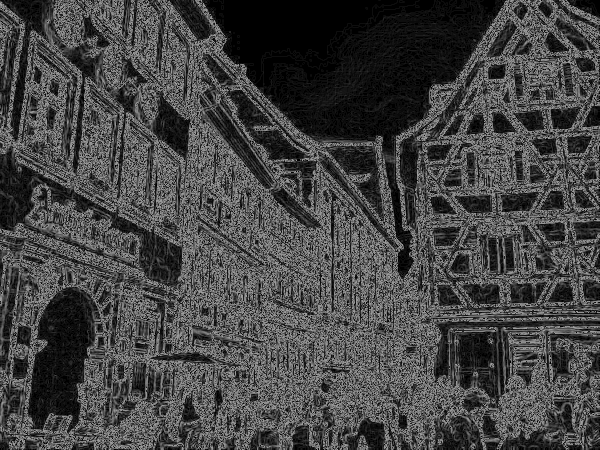

In [ ]:
cv2_imshow(roberts)

Prewitt

In [ ]:
Xaxis = np.array([[-1, 0, 1,],[ -1, 0, 1],[-1, 0, 1]])

Yaxis = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [ ]:
vertical = ndimage.convolve( gray, Xaxis  )

horizontal = ndimage.convolve( gray, Yaxis )

In [ ]:
Prewitt = np.sqrt( np.square(horizontal) + np.square(vertical))

In [ ]:
Prewitt*=10

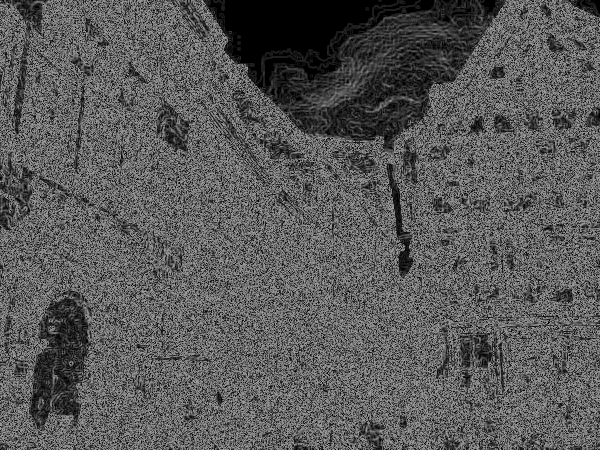

In [ ]:
cv2_imshow(Prewitt)

Sobel 3x3

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel3= np.sqrt( np.square(sobelx) + np.square(sobely))

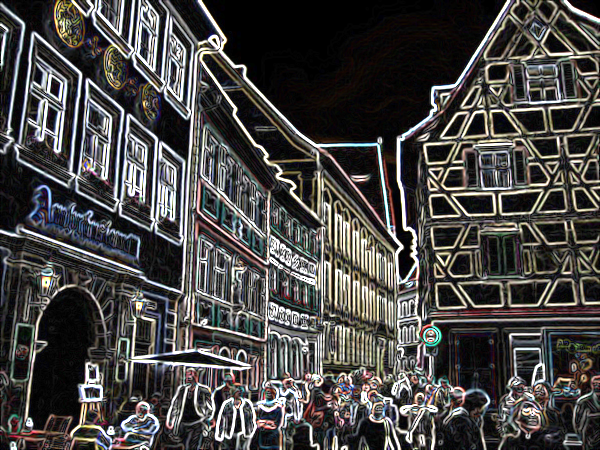

In [ ]:
cv2_imshow(sobel3)

Sobel 5x5

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobel5= np.sqrt( np.square(sobelx) + np.square(sobely))

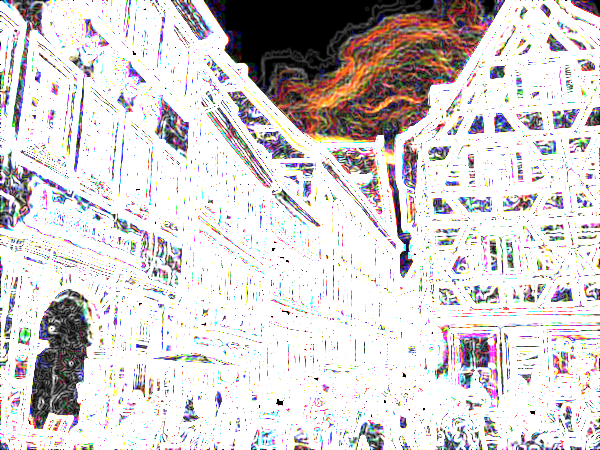

In [ ]:
cv2_imshow(sobel5)

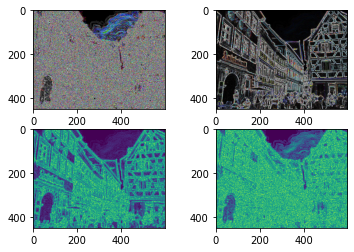

In [ ]:
f, axarr = plt.subplots(2,2)
_sobel5= np.array(sobel5, dtype=np.uint8)
_sobel3= np.array(sobel3, dtype=np.uint8)
_roberts= np.array(roberts, dtype=np.uint8)
_prewitt= np.array(Prewitt, dtype=np.uint8)
axarr[0,0].imshow(_sobel5)
axarr[0,1].imshow(_sobel3)
axarr[1,0].imshow(_roberts)
axarr[1,1].imshow(_prewitt)

Canny


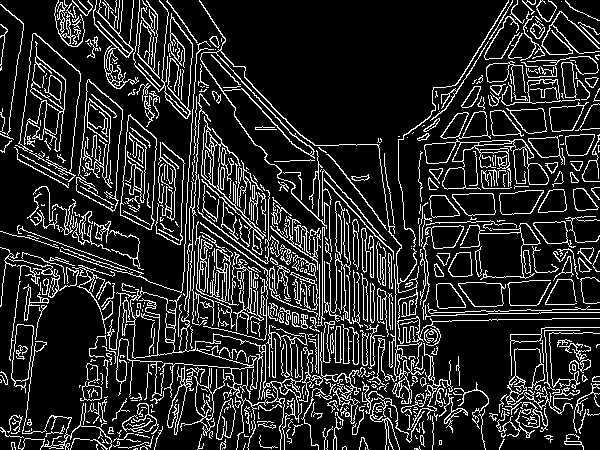

In [ ]:
t_lower = 50
t_upper = 150
canny = cv2.Canny(img, t_lower, t_upper)
cv2_imshow(canny)

Corners


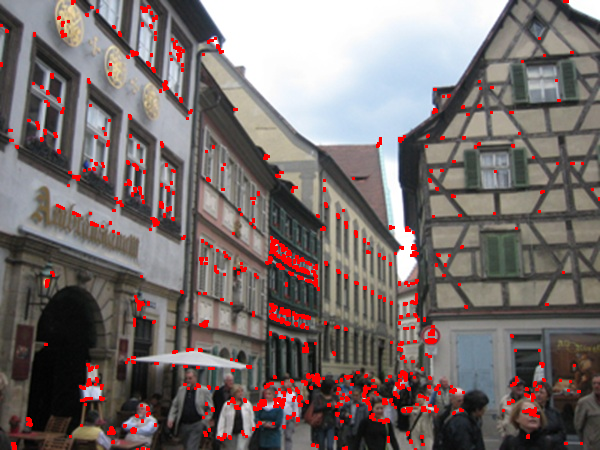

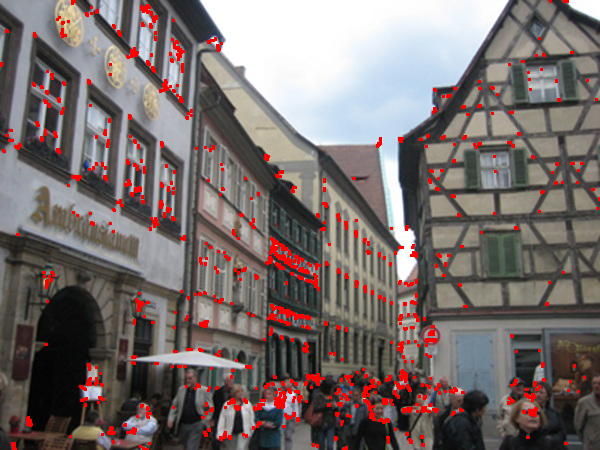

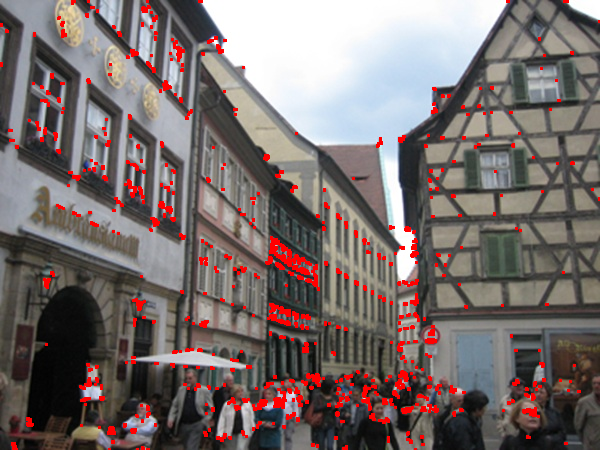

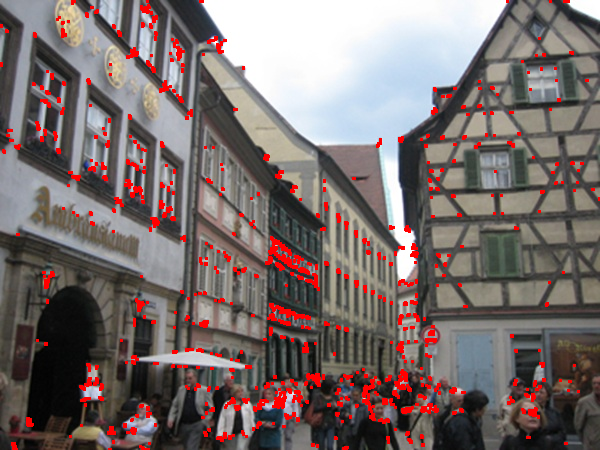

In [ ]:
# convert the input image into
# grayscale color space
img1=cv2.imread('/content/city.jpg')
img2=cv2.imread('/content/city.jpg')
img3=cv2.imread('/content/city.jpg')
img4=cv2.imread('/content/city.jpg')
operatedImage = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
 
# modify the data type
# setting to 32-bit floating point
operatedImage1 = np.float32(operatedImage)
operatedImage2 = np.float32(operatedImage)
operatedImage3 = np.float32(operatedImage)
operatedImage4 = np.float32(operatedImage)
 
# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest1 = cv2.cornerHarris(operatedImage1, 2, 3, 0.07)
dest2 = cv2.cornerHarris(operatedImage2, 2, 5, 0.07)
dest3 = cv2.cornerHarris(operatedImage3, 2, 3, 0.04)
dest4 = cv2.cornerHarris(operatedImage4, 2, 5, 0.04)
 
# Results are marked through the dilated corners
dest1 = cv2.dilate(dest1, None)
dest2 = cv2.dilate(dest2, None)
dest3 = cv2.dilate(dest3, None)
dest4 = cv2.dilate(dest4, None)
 
# Reverting back to the original image,
# with optimal threshold value
img1[dest1 > 0.01 * dest1.max()]=[0, 0, 255]
img2[dest2 > 0.01 * dest2.max()]=[0, 0, 255]
img3[dest3 > 0.01 * dest3.max()]=[0, 0, 255]
img4[dest4 > 0.01 * dest4.max()]=[0, 0, 255]
 
# the window showing output image with corners
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
cv2_imshow(img4)

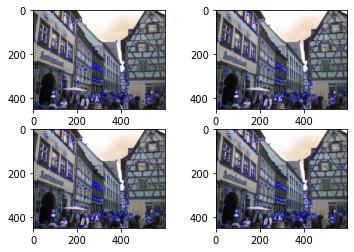

In [ ]:
f, axarr = plt.subplots(2,2)
#_sobel5= np.array(sobel5, dtype=np.uint8)
#_sobel3= np.array(sobel3, dtype=np.uint8)
#_roberts= np.array(roberts, dtype=np.uint8)
#_prewitt= np.array(Prewitt, dtype=np.uint8)
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)